Spam message classification
data spam - '/home/al/Projects_My/NLP-russian-language/datasets/spam.tsv'

In [1]:
file_data = '/home/al/Projects_My/NLP-russian-language/datasets/spam.tsv'

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(file_data, sep = '\t')

In [4]:
print(df.head(10))

  label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2
5  spam  FreeMsg Hey there darling it's been 3 week's n...     147      8
6   ham  Even my brother is not like to speak with me. ...      77      2
7   ham  As per your request 'Melle Melle (Oru Minnamin...     160      6
8  spam  WINNER!! As a valued network customer you have...     157      6
9  spam  Had your mobile 11 months or more? U R entitle...     154      2


In [5]:
# проверим неопределенных значений
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
df.tail()

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
# Посмотрим как распределены значения поля label
df['label'].value_counts() * 100/len(df)

ham     86.593683
spam    13.406317
Name: label, dtype: float64

In [9]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']
ham = ham.sample(spam.shape[0])

In [10]:
data = ham.append(spam, ignore_index=True)

In [11]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

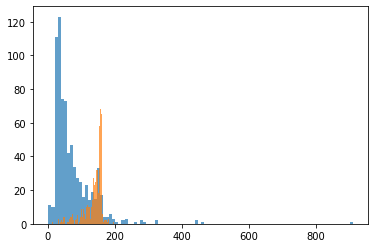

In [12]:
plt.hist(data[data['label'] == 'ham']['length'],bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'],bins = 100, alpha = 0.7)
plt.show()

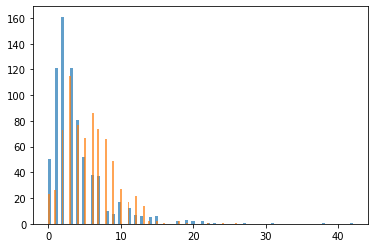

In [13]:
plt.hist(data[data['label'] == 'ham']['punct'],bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'],bins = 100, alpha = 0.7)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_test, x_train, Y_test, y_train = train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True)

## Building the Model (Random Forest)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [31]:
classifier = Pipeline([('tfidf', TfidfVectorizer()), ('classifier', RandomForestClassifier(n_estimators = 100))])

In [32]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

## Predicting the results (Random Forest)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [35]:

accuracy_score(Y_test, y_pred)

0.939712918660287

In [36]:
confusion_matrix(Y_test, y_pred)

array([[514,   6],
       [ 57, 468]])

In [37]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      0.99      0.94       520
        spam       0.99      0.89      0.94       525

    accuracy                           0.94      1045
   macro avg       0.94      0.94      0.94      1045
weighted avg       0.94      0.94      0.94      1045

